In [1]:
 #installing tensorflow version 2.0
 !pip install tensorflow==2.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.0


In [2]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [3]:
#styling purpose
!pip install jupyterthemes

In [4]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [5]:
#Load the training and testing datasets
instagram_df_test = pd.read_csv('test.csv')
instagram_df_train = pd.read_csv('train.csv')

In [6]:
#the dataset which will be used for training purpose (576 records)
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [7]:
#the dataset which will be used for testing purpose (120 records)
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [8]:
#Getting dataframe info

instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [9]:
#Statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [10]:
#Check if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [11]:
#Number of unique values in the profile pic column
instagram_df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [12]:
#Number of fake and real accounts
instagram_df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [13]:
#Number of accounts having an external URL
instagram_df_train['external URL'].value_counts()

external URL
0    509
1     67
Name: count, dtype: int64

In [14]:
#Number of accounts having description length over 50
(instagram_df_train['description length'] > 50).sum()

98

In [15]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [16]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [17]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [18]:
instagram_df_test['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

<Axes: ylabel='count'>

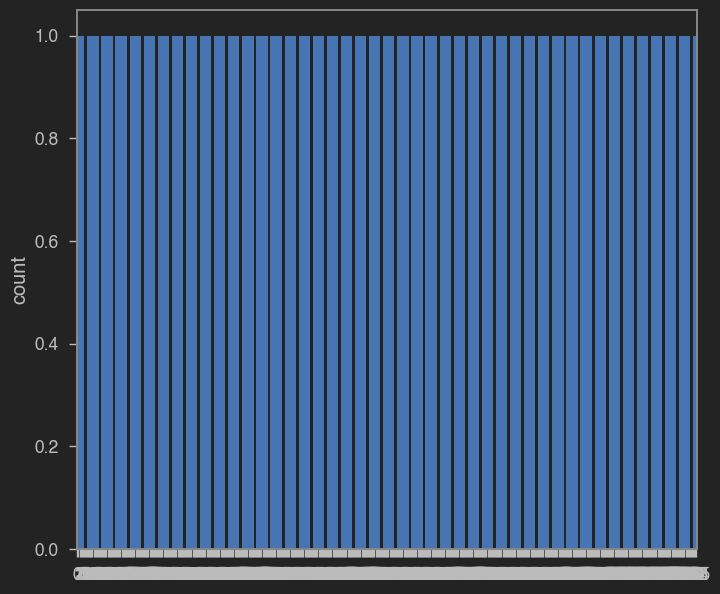

In [19]:
#Vislualizing the number of fake and real accounts (using seaborn library)
sns.countplot(instagram_df_train['fake'])

/var/folders/7l/g6s2xv9j539_jk1v5nm3k0wc0000gn/T/ipykernel_55051/2746094449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(instagram_df_train['private'],palette = "PuBu")


<Axes: ylabel='count'>

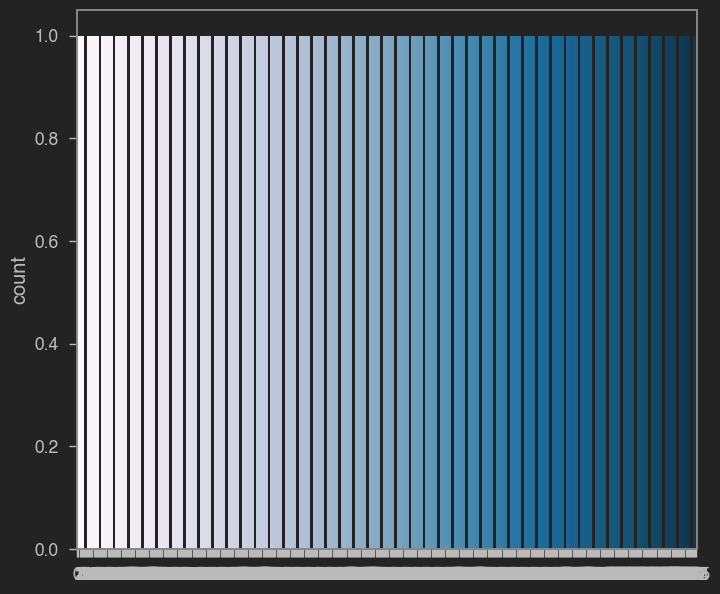

In [20]:
#Visualizing the private column
sns.countplot(instagram_df_train['private'],palette = "PuBu")

/var/folders/7l/g6s2xv9j539_jk1v5nm3k0wc0000gn/T/ipykernel_55051/2936145885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(instagram_df_train['profile pic'],palette = "Pastel2")


<Axes: ylabel='count'>

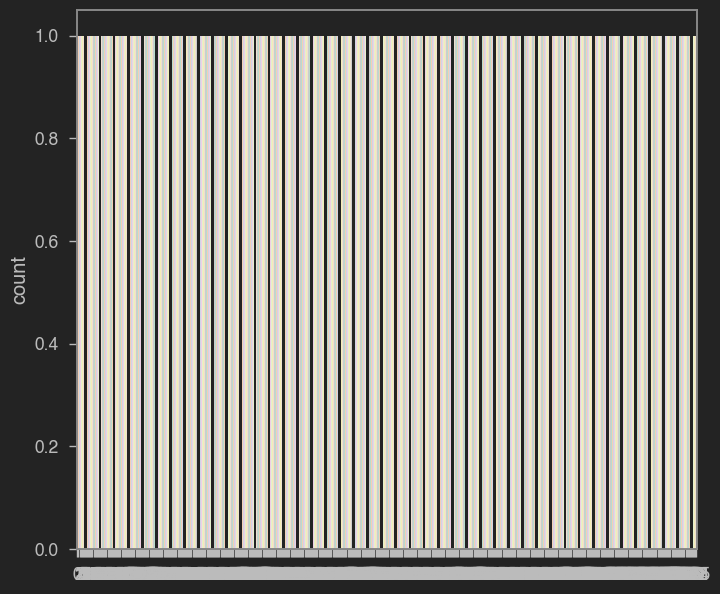

In [21]:
#Visualizing the profile pic feature
sns.countplot(instagram_df_train['profile pic'],palette = "Pastel2")

/var/folders/7l/g6s2xv9j539_jk1v5nm3k0wc0000gn/T/ipykernel_55051/2810340997.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'],kde=True)


<Axes: xlabel='nums/length username', ylabel='Density'>

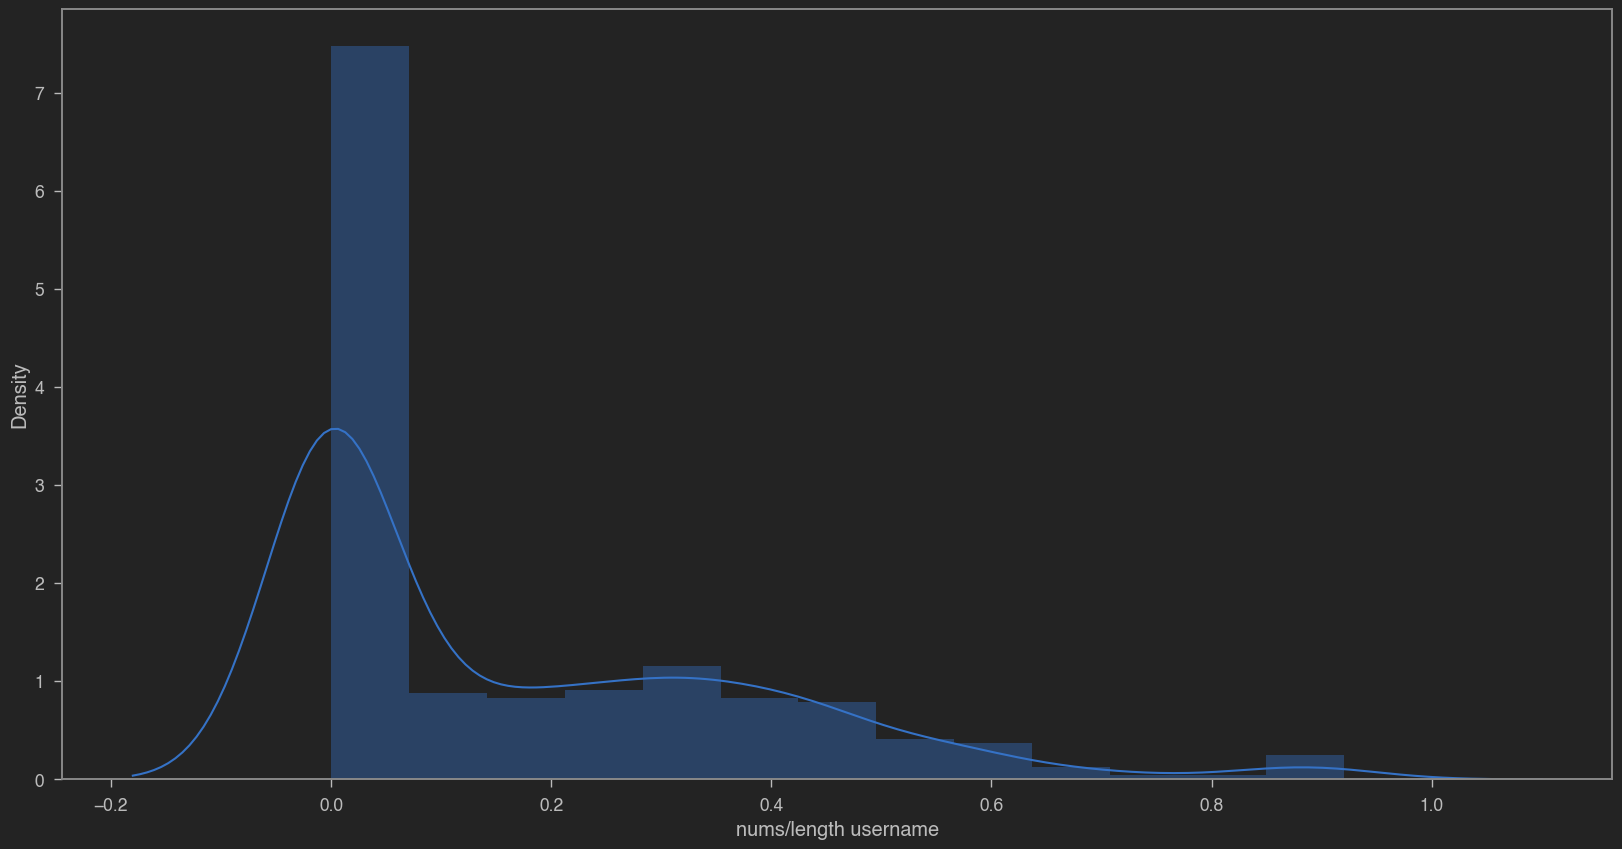

In [22]:
#Visualizing the length of usernames(Histogram)
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'],kde=True)

<Axes: >

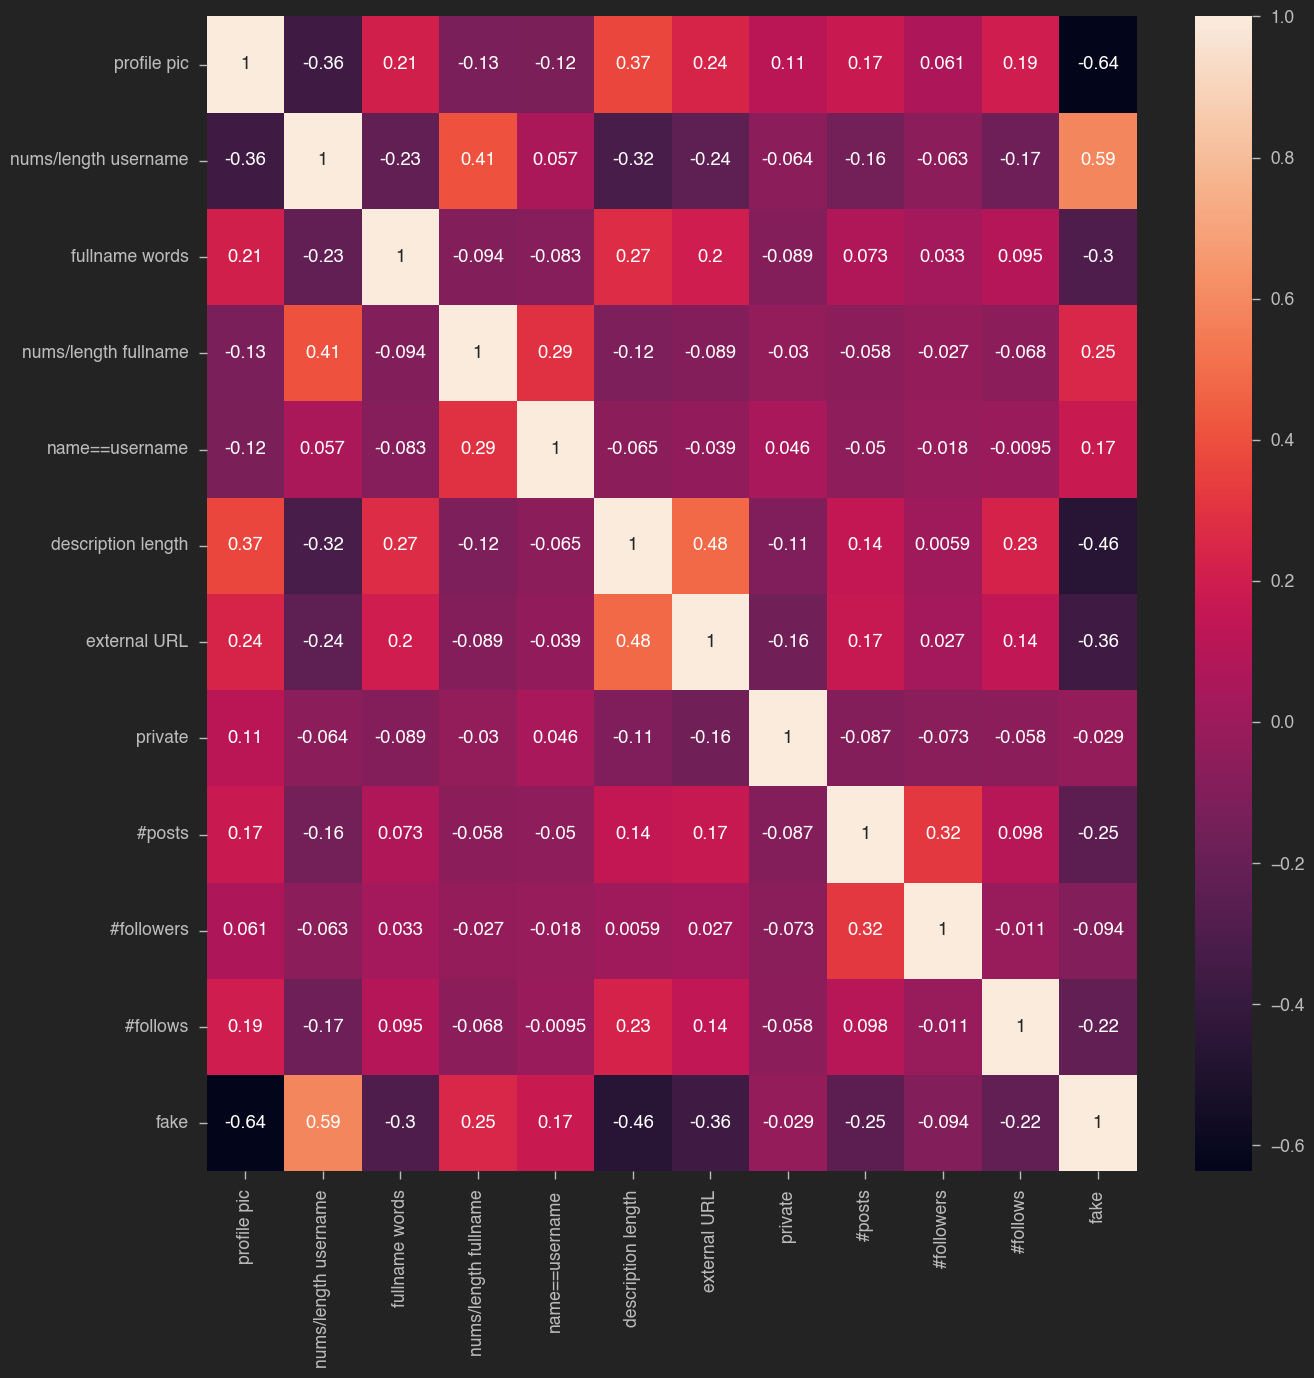

In [23]:
#Correlation heatmap
plt.figure(figsize=(15,15))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

<Axes: ylabel='count'>

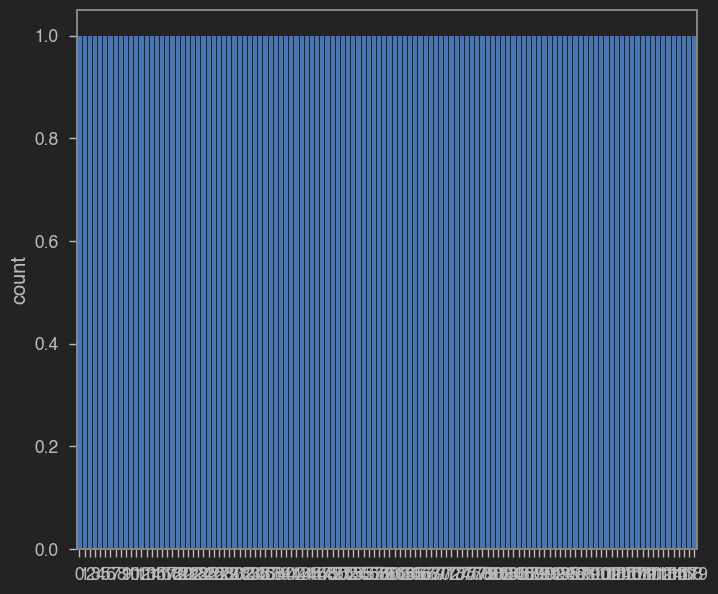

In [24]:
sns.countplot(instagram_df_test['fake'])

/var/folders/7l/g6s2xv9j539_jk1v5nm3k0wc0000gn/T/ipykernel_55051/1417521828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(instagram_df_test['private'],palette = "Set2")


<Axes: ylabel='count'>

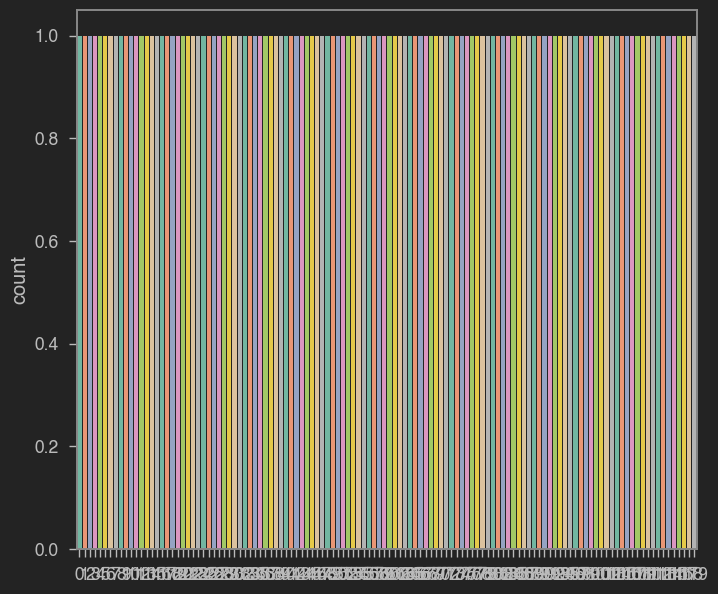

In [25]:
sns.countplot(instagram_df_test['private'],palette = "Set2")

<Axes: ylabel='count'>

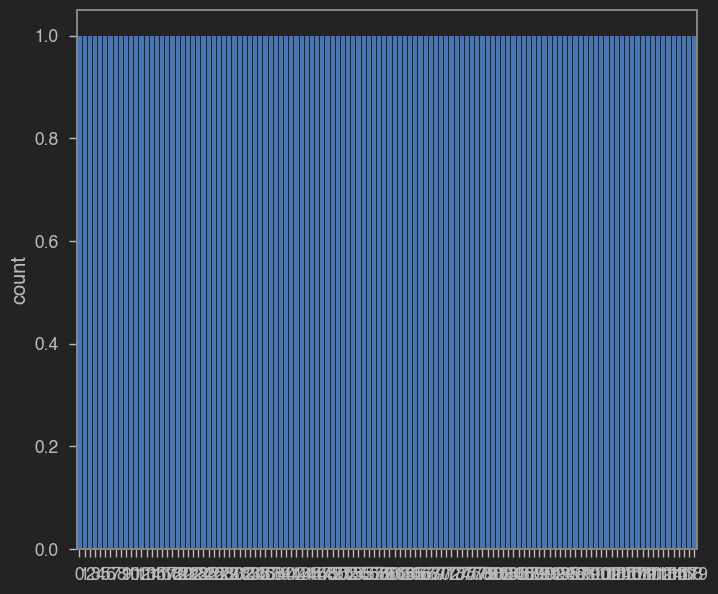

In [26]:
sns.countplot(instagram_df_test['profile pic'])

In [27]:
x_test

NameError: name 'x_test' is not defined

In [29]:
#Preparing the outputs (Takin only the fake column into consideration.)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [30]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [31]:
#Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [32]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [33]:
#Having a look at the shapes after scaling the data
X_train.shape,X_test.shape

((576, 11), (120, 11))

In [34]:
Y_train.shape,Y_test.shape

((576, 2), (120, 2))

In [35]:
#Percentage of Traininf data
Training_data_percentage = len(X_train)/(len(X_train) + len(X_test) ) * 100
Training_data_percentage


82.75862068965517

In [36]:
Testing_data_percentage = len(X_test)/(len(X_train) + len(X_test) ) * 100
Testing_data_percentage


17.24137931034483

In [37]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential() 
model.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()

C:\Users\Ishwarya T\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │           7,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           3,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,077 (47.18 KB)

 Trainable params: 12,077 (47.18 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
epochs_hist = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5696 - loss: 0.6940 - val_accuracy: 0.8103 - val_loss: 0.5923
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8068 - loss: 0.5288 - val_accuracy: 0.8621 - val_loss: 0.3781
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8247 - loss: 0.4475 - val_accuracy: 0.8621 - val_loss: 0.2759
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8869 - loss: 0.3250 - val_accuracy: 0.8793 - val_loss: 0.2557
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8911 - loss: 0.3086 - val_accuracy: 0.8793 - val_loss: 0.2342
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9033 - loss: 0.2777 - val_accuracy: 0.8966 - val_loss: 0.2000
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9137 - loss: 0.2795 - val_accuracy: 0.8966 - val_loss: 0.1825
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9072 - loss: 0.2823 - val_accuracy: 0.8966 - val_loss

**<h2> TASK-7</h2>**

---


**<h2><i>ASSESSING THE PRERFORMANCE OF THE MODEL**

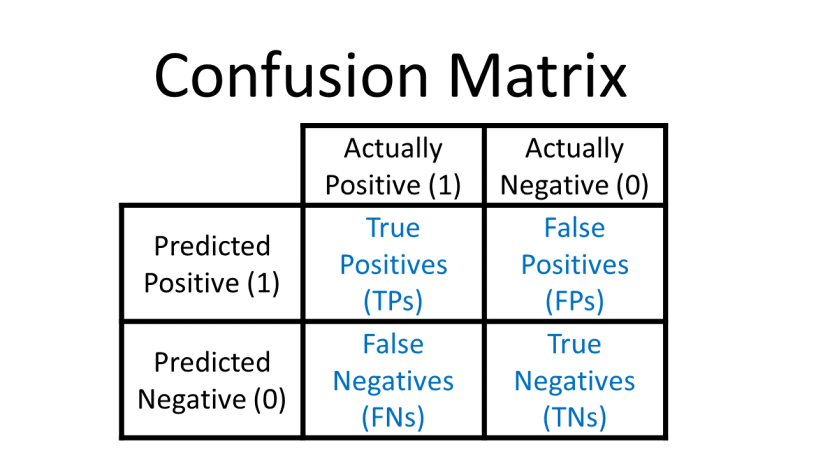

In [40]:
print(epochs_hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


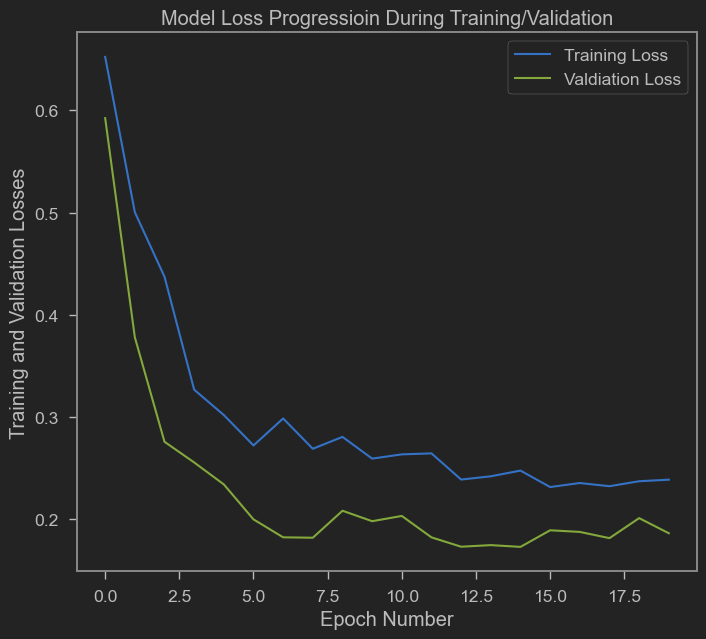

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])


In [42]:
predicted = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [43]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [44]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.91      0.85      0.88        60

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



<Axes: >

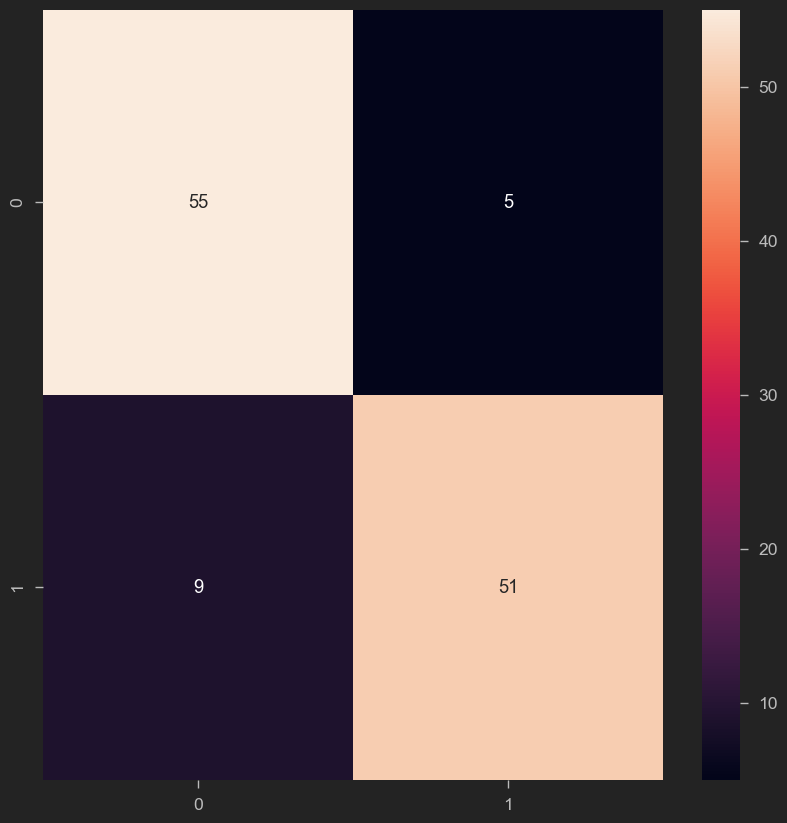

In [45]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

**<h2> INFERENCES AND CONCLUSION: </h2>**

<i>

* Thus, we have analyzed the dataset and obtained a fairly accurate predictive model using Neural networks.

* The model is hence trained to detect fake accounts in instagram based on the considered features.

* We achieved 95 percent accuracy in detecting the fake accounts by training the model using  datasets (from train.csv) . We have checked whether the model has reached the ability to detect an account is fake or not by inputting different set of data values (test.csv file) which consisted 120 account details. 

* The model predicted true values for 106 accounts and predicted false values for 14 accounts out of 120 accounts.

**<h2> REFERENCES : </h2>**
Check out the following resources to learn more about the tools and libraries used in this notebook:

<i>


* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

* Tensorflow user guide : https://www.tensorflow.org/guide

* Tenorflow Playground : https://playground.tensorflow.org

* Neural Networks : https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464


In [47]:
model.save("insta-fake-real.h5")

In [56]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("insta-fake-real.h5")

# Assuming x_test and y_test are already available in your environment
# Make predictions (probabilities)
y_pred_prob = model.predict(x_test)

# Convert probabilities to binary class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int").flatten()

# Convert y_test to a NumPy array if it's a Pandas Series
y_actual = y_test.to_numpy()

# Check the shape of actual and predicted values
print("Shape of y_actual:", y_actual.shape)
print("Shape of y_pred:", y_pred.shape)

# Ensure both have the same length (if needed)
min_len = min(len(y_actual), len(y_pred))
y_actual = y_actual[:min_len]
y_pred = y_pred[:min_len]

# Create a comparison DataFrame
df_comparison = pd.DataFrame({
    'Actual': y_actual,
    'Predicted': y_pred
})

# Show the first few rows of the comparison
print(df_comparison.sample(50))



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Shape of y_actual: (120,)
Shape of y_pred: (240,)
     Actual  Predicted
78        1          1
33        0          0
73        1          0
79        1          0
77        1          0
93        1          0
97        1          0
63        1          0
14        0          1
22        0          1
37        0          0
12        0          1
98        1          1
116       1          1
2         0          1
66        1          1
70        1          1
28        0          1
1         0          0
38        0          1
103       1          0
29        0          0
54        0          1
109       1          0
11        0          0
56        0          1
80        1          1
39        0          0
17        0          0
71        1          0
52        0          1
75        1          0
84        1          1
53        0          0
30        0          1
8         0          1
50        0          1
117       1          0
49        0    